# Übungsaufgabe 2D-Plots mit Matplotlib

Ausgehend von den Daten der Tafelübung wird angenommen, dass die Datei `results.mat` Messdaten eines math. Pendels enthält. Unbekannt Sei die genutzte Länge des Pendels $l$ und die Auslenkung $A_0$. Ziel dieser Übung ist es ausgehend von der Übung Parameteridentifikation den Verlauf der Optimierung grafisch darzustellen.

Wir benötigen zunächst wieder die Funktionsdefinition des math. Pendels aus der sympy-Übung:

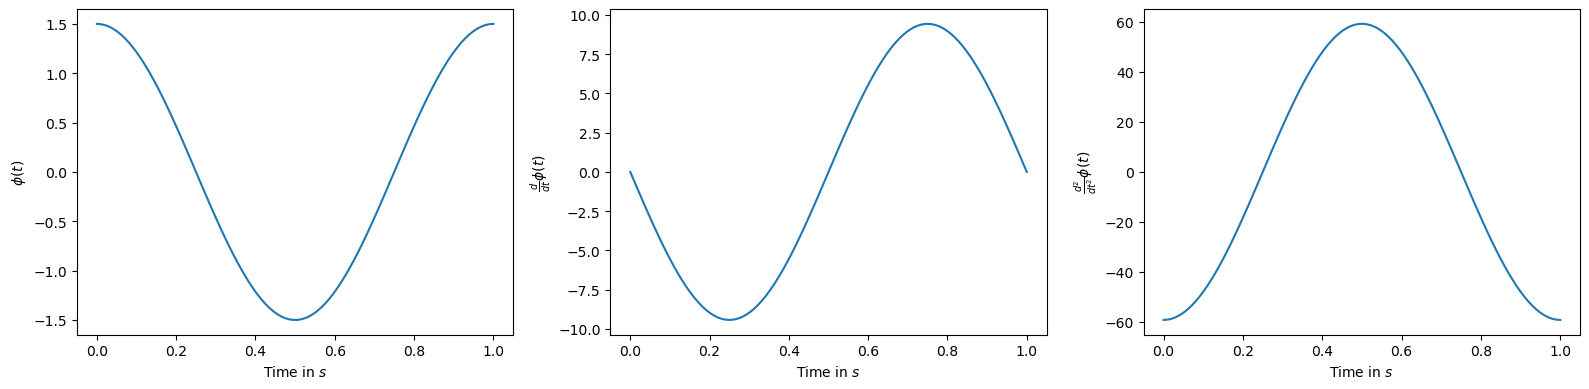

In [1]:
%run U:/STUDY/Py4NE/Tag02/übungen/sympy_pendel_luecke.ipynb

In [2]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib.pyplot as pl

Daten laden und visualisieren

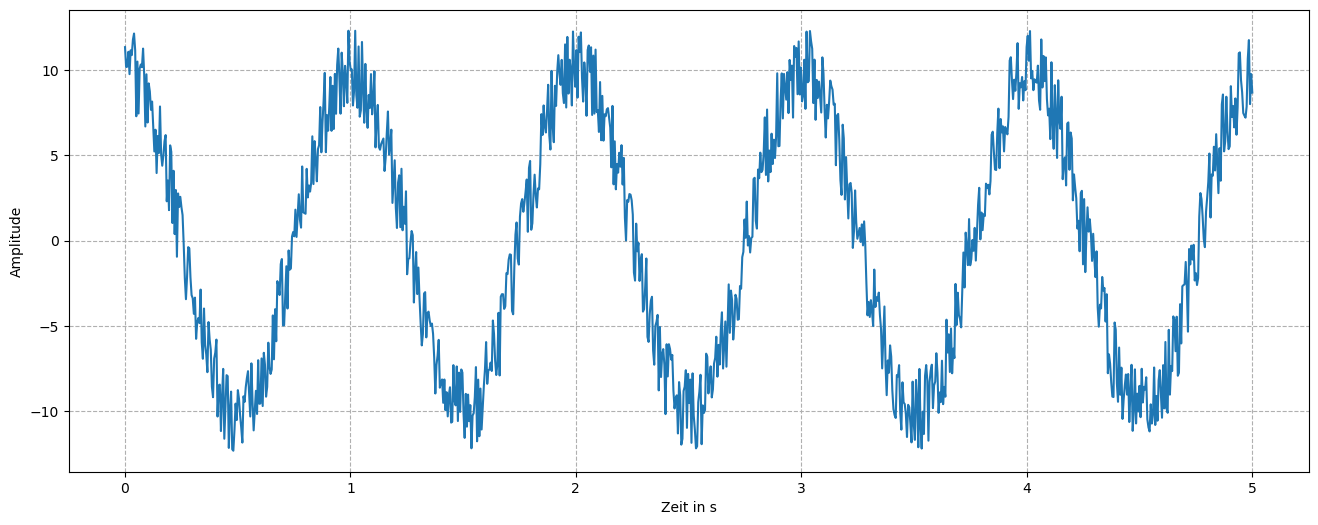

In [3]:
di = loadmat('U:/STUDY/Py4NE/Tag02/übungen/results.mat')
t = di['t'][0]
sig = di['gest'][0]

pl.figure(figsize=(16, 6))
pl.plot(t, sig, label='gestört')
pl.xlabel('Zeit in s')
pl.ylabel('Amplitude')
pl.grid(ls='--')

Minimierungsfunktion aus Parameteridentifikation.ipynb ein wenig umschreiben

Start- und Grenzwerte setzen:

In [4]:
p0 = np.array([0.21, 8.])
bou = ((0.01, None), (0.01, None))

Liste zum Speichern der Zwischenergebnisse anlegen

In [5]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

In [6]:
reslist = list()

In [7]:
def min_target(p):
    global t, phit_f, sig, reslist
    l, A0 = p
    g = 9.81
    om = (g/l)**0.5
    f = om/(2*np.pi)

    phi = phit_f(A0, om, t)
    
    # zwischenergebnisse an die liste anhängen
   

    err = np.sum((phi-sig)**2)
    reslist.append(phi)
    # print(err)
    return err

Optimierung berechnen

In [8]:
res_min = minimize(min_target, p0, bounds=bou)
res_min

      fun: 2124.6897185563125
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.65185918e+01,  4.86579625e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 20
     njev: 24
   status: 0
  success: True
        x: array([0.25025817, 9.94243892])

Abbildungen anlegen für

1. Startergebnis
2. Endergebnis
3. Fehler


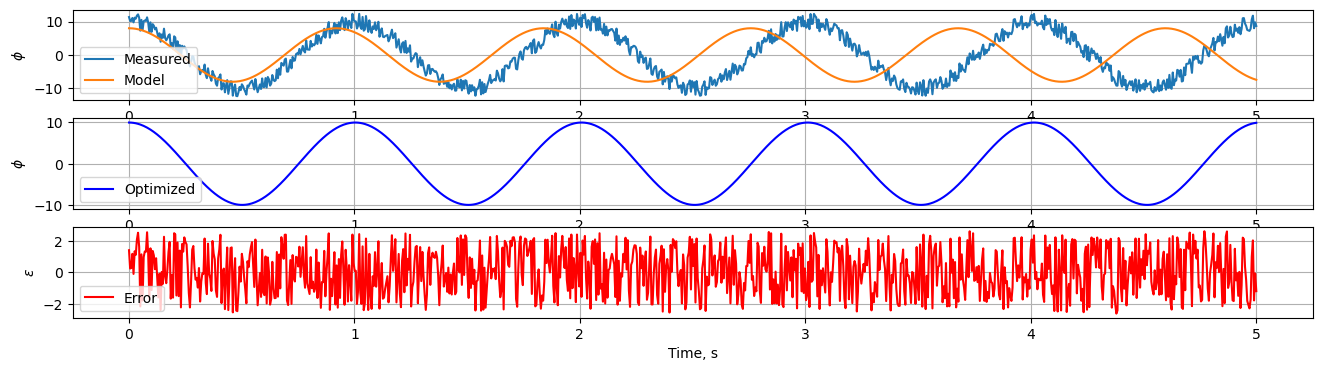

In [10]:
fig, (ax1, ax2, ax3) = pl.subplots(3,1, figsize=(16,4))

# Subplot fuer Anfangswerte
ax1.plot(t, sig, label ='Measured')
ax1.plot(t,reslist[0],label='Model')
ax1.legend(loc='lower left')
ax1.grid('-')
ax1.set_ylabel("$\phi$")
ax1.set_xlabel('Time, s')
# Subplot fuer Optimierungsergebnise
ax2.plot(t,reslist[-1],c='b',  label='Optimized')
ax2.legend(loc='lower left')
ax2.grid('-')
ax2.set_ylabel("$\phi$")
ax2.set_xlabel('Time, s')
# Subplot fuer Restfehler der Position x
ax3.plot(t, sig -reslist[-1], c='r',  label='Error')
ax3.legend(loc='lower left')
ax3.grid('-')
ax3.set_ylabel("$\epsilon$")
ax3.set_xlabel('Time, s')
fig.subplots_adjust()

In [11]:
# bilder abspeichern
fig.savefig('optimized.png', bbox_inches='tight') # png
fig.savefig ('optimized.pdf', bbox_inches='tight')# pdf

Verlauf der Optimierung Plotten mit verschiedenen Grautönen

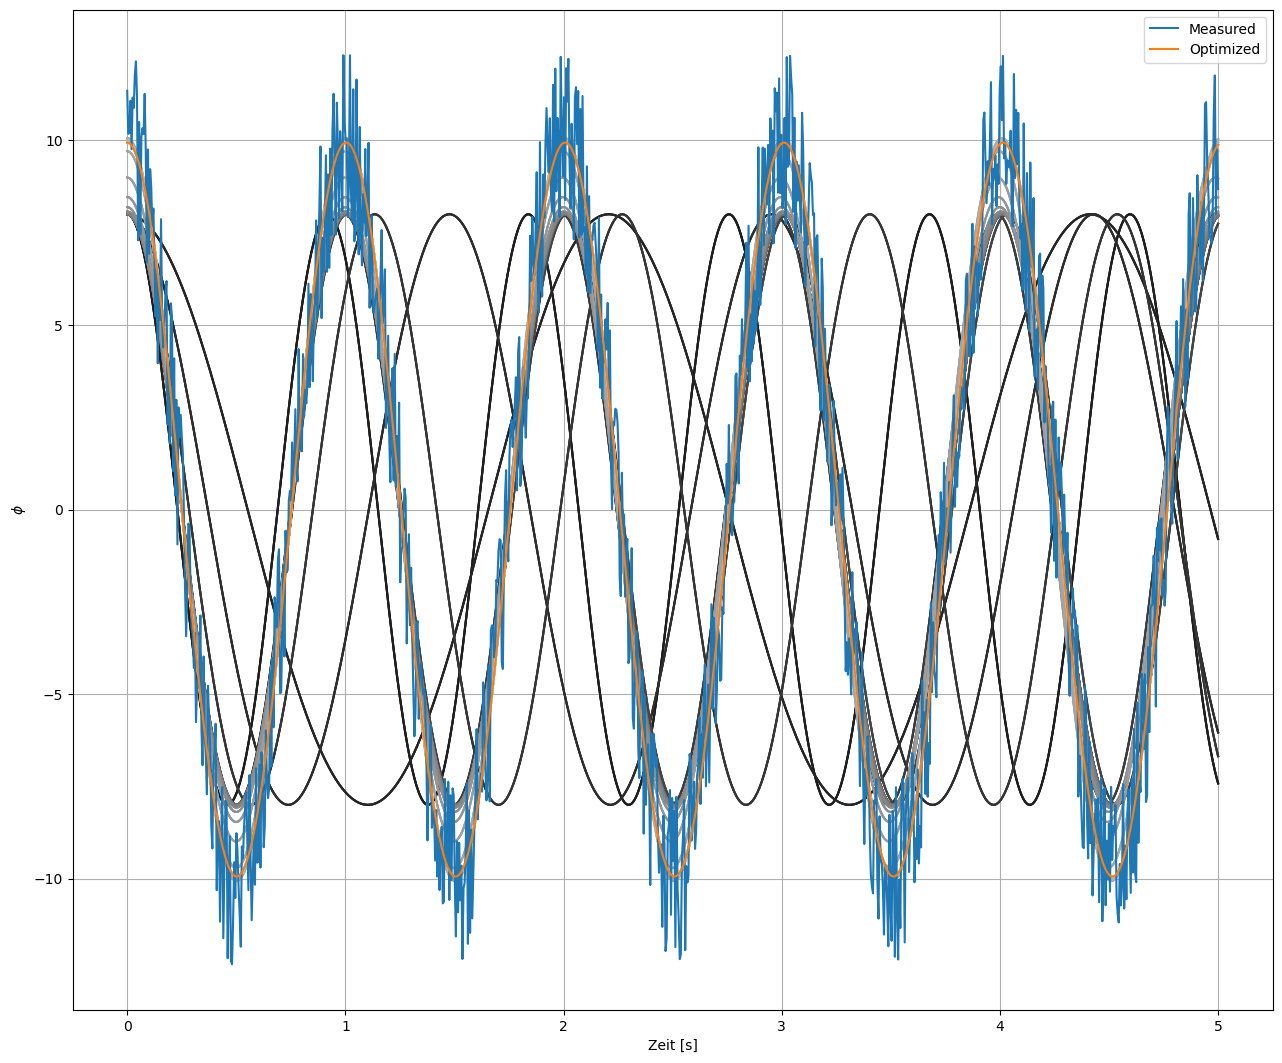

In [19]:
fig = pl.figure(figsize=(12,10))
ax = fig.add_axes((0,0,1,1))

# Plotten aller Zwischenergebnisse in verschiedenen Grautoenen (0.1 < col < 0.8)
for i in range(len(reslist)-1):
    colStep = 0.7/len(reslist)
    ax.plot(t,reslist[i], c=str(0.1+i*colStep))

    

# Plotten der Messung und der Simulation
ax.plot(t,sig, label='Measured')
ax.plot(t,reslist[-1], label='Optimized')
ax.grid('-')
ax.legend()
ax.set_xlabel('Zeit [s]')
ax.set_ylabel(r'$\phi$')

fig.savefig('optiv.png', dpi=300) # png
fig.savefig('optiv.pdf') # pdf

Verlauf der Optimierung in 3D plotten

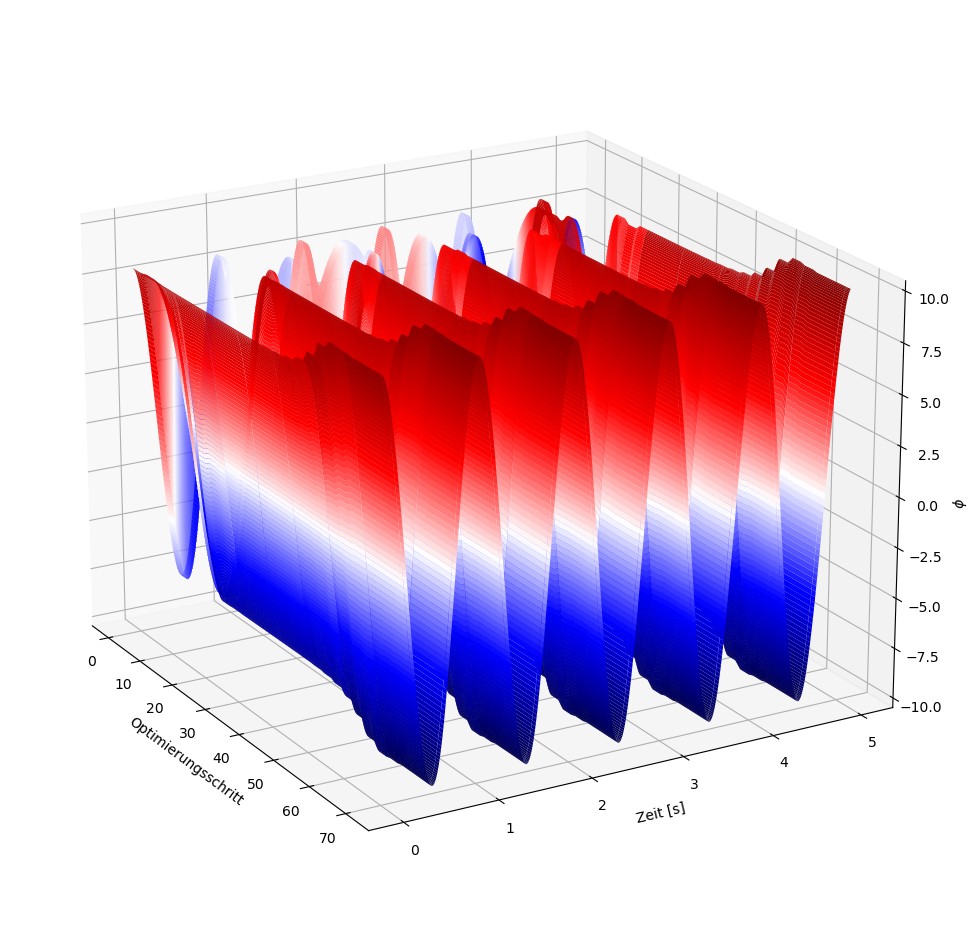

In [34]:
from matplotlib import cm
from pylab import meshgrid

fig = pl.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

Z = np.vstack(reslist).T
X, Y = meshgrid(range(len(reslist)), t)
ax.plot_surface(X,Y,Z, cmap=cm.seismic, rstride=1)
ax.set_xlabel('Optimierungsschritt')
ax.set_ylabel('Zeit [s]')
ax.set_zlabel(r'$\phi$')
ax.view_init(20, -30)

In [ ]:
fig.savefig('optiv3.png', dpi=300) # png
fig.savefig('optiv3.pdf') # pdf